In [2]:
# !pip install wordcloud -q

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df

,email,label
0,Subject: re : rankings\nthank you .,ham
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,Subject: research group move to the 19 th floo...,ham
3,Subject: christmas baskets\nthe christmas bask...,ham
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham
...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam
5850,"Subject: localized software , all languages av...",spam
5851,Subject: instant branded software download\nso...,spam
5852,"Subject: localized software , all languages av...",spam


In [6]:
df['email'][1]

'Subject: re : visit to enron\nvince ,\ndec . 29 at 9 : 00 will be fine . i have talked to shirley and have\ndirections .\nthanks , bob\nvince j kaminski wrote :\n> bob ,\n>\n> can you come to our office on dec 29 at 9 : 00 a . m . ?\n>\n> please , call shirley crenshaw ( 3 - 5290 ) or stinson gibner ( 3 - 4748 )\n> from the reception to be admitted to the building .\n>\n> vince kaminski'

In [7]:
df['label'].value_counts()

label
ham     4358
spam    1496
Name: count, dtype: int64

<Axes: >

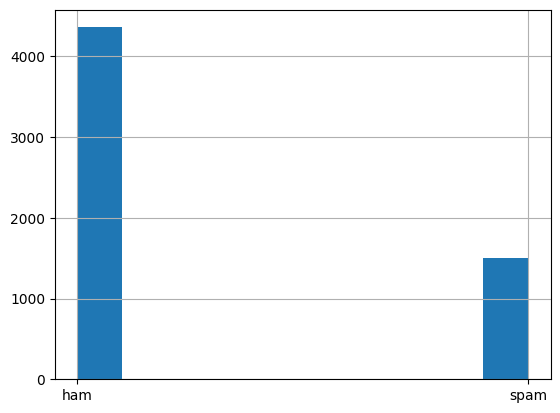

In [8]:
df['label'].hist()

In [9]:
df['b_labels'] = df['label'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [10]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
df

,email,label,b_labels
0,Subject: re : rankings\nthank you .,ham,0
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham,0
2,Subject: research group move to the 19 th floo...,ham,0
3,Subject: christmas baskets\nthe christmas bask...,ham,0
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham,0
...,...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam,1
5850,"Subject: localized software , all languages av...",spam,1
5851,Subject: instant branded software download\nso...,spam,1
5852,"Subject: localized software , all languages av...",spam,1


In [12]:
df_train, df_test, Y_train, Y_test = train_test_split(df['email'], Y, test_size=0.33)

In [13]:
vectores = CountVectorizer(decode_error='ignore')
X_train = vectores.fit_transform(df_train)
X_test = vectores.transform(df_test)

In [14]:
X_train

<3922x33908 sparse matrix of type '<class 'numpy.int64'>'
	with 497540 stored elements in Compressed Sparse Row format>

In [15]:
X_test

<1932x33908 sparse matrix of type '<class 'numpy.int64'>'
	with 221719 stored elements in Compressed Sparse Row format>

In [16]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train acc:', model.score(X_train, Y_train))
print('test acc:', model.score(X_test, Y_test))

train acc: 0.9969403365629781
test acc: 0.9927536231884058


In [18]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print('train f1:', f1_score(Y_train, P_train))
print('test f1:', f1_score(Y_test, P_test))

train f1: 0.9941118743866536
test f1: 0.9854771784232366


In [32]:
cm_train = confusion_matrix(Y_train, P_train)
cm_train

array([[2897,   10],
       [   2, 1013]], dtype=int64)

In [34]:
cm_test = confusion_matrix(Y_test, P_test)
cm_test

array([[1443,    8],
       [   6,  475]], dtype=int64)

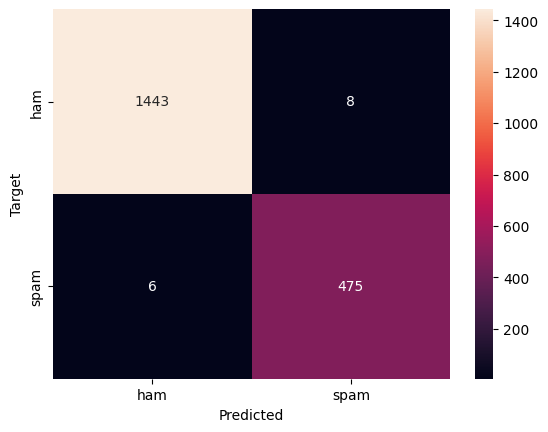

In [36]:
def plot_cm(cm):
    classes = ['ham', 'spam']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel ("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm_test)

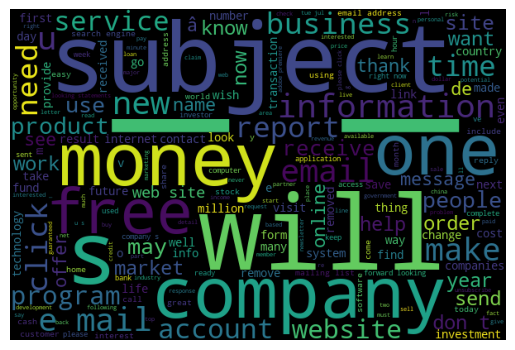

In [40]:
# visualize the data
def visualize(label):
    words = ''
    for msg in df[df[ 'label'] == label]['email']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
visualize('spam')

In [42]:
# Añadir predicciones del modelo al df original para comparar contra su etiqueta real
X = vectores.transform(df['email'])
df['predictions'] = model.predict(X)
df

,email,label,b_labels,predictions
0,Subject: re : rankings\nthank you .,ham,0,0
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham,0,0
2,Subject: research group move to the 19 th floo...,ham,0,0
3,Subject: christmas baskets\nthe christmas bask...,ham,0,0
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham,0,0
...,...,...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam,1,1
5850,"Subject: localized software , all languages av...",spam,1,1
5851,Subject: instant branded software download\nso...,spam,1,1
5852,"Subject: localized software , all languages av...",spam,1,1


In [48]:
# Correos predichos como spam cuando realmente no lo eran
falso_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['email']
for msg in falso_spam:
    print(msg)

Subject: a basic idea of price - offer matching clauses
vince -
here is the basic idea i was alluding to :
suppose a car dealer promised to " match any advertised price . " then his
competitor would feel the need to respond in kind . and so on , until all
dealers advertised they would " match any advertised price . " now , consider one
of these dealer ' s decision to perhaps lower his prices . if he does so ,
everyone will immediately match his price , so his market share will remain
unchanged , at whatever it was before , but his revenues ( and all other dealers
as well ) would be lowered by the amount of his price reduction . so , the
dealer rationally decides not to lower his prices to try to sell more cars .
now , suppose a limited partnership , where the partners contract to " control "
who they are in business with , by putting a " right of first refusal " clause
into the partnership ' s papers , whereby any partner wishing to sell his
interests must offer the remaining partners 

In [50]:
# Correos predichos como spam cuando realmente no lo eran
falso_NO_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['email']
for msg in falso_NO_spam:
    print(msg)

Subject: re : change of plans
hello you two ,
i am so sorry catherine for not writing recently . i have just been vv busybeing a working mother and sometimes it all gets too much you know ! ! i cannot wait to see you both although we may meet at the airport on the 16 / 6 as that ' s the day we ' re going to france but i will see you both at bronagh ' s house for her 30 th which we ' re going to on the way back from the airport . i am so excited about seeing you ! ! ! liitle eva ( aine ) was born on tuesday
she is absolutely incredible . poor bronagh is 11 dsays over ! !
sounds like you ' ve been having an amazing time . hope you won ' t be too depressed to be back ! !
lots of love
deirdre
" justin mason " wrote :
<
< just a quick note -
<
< we ' ve decided to go up to annapurna base camp instead of
< the jomsom trek - it ' s a bit more impressive visually
< ( if a little soggier ) . so as of tomorrow morning , ourselves
< and our guide bhadra will be leaping like gazelles up 4000 - odd